# Apprentice Chef Analysis Report

Apprentice Chef (AC) can predict revenue over each customer’s life cycle via optimizing the time of each meal preparation video and rating per meal set - as they have the highest correlation to revenue (see Appendix B) through: 
 
1. **Finding a sweet spot between 8-150 seconds**, which is the average attention span and time per instruction video. Consider adopting a similar video format to Buzzfeed’s recipe videos where videos range from 30-120 seconds and only show the cooking process (Thurston, 2015).With a short and aesthetically pleasing video, attention span will be less of a concern and customers will be more inclined to purchase a meal set. 

 
2. **Replacing fixed meal set strategy with flexibility in the selection process**. Adhering to personal health and wellness criteria without compromising the menu will improve ratings (Kvidahl, 2018) and tailored meal suggestion strategies. 
 
 
AC can also guarantee subscriptions to the new cross-selling plan by optimizing with customers who registered using their full names and not junk email - as evident in the highest correlation value in Appendix C by: 
 
 
1. **Improving UX design to encourage clients to input professional emails upon signing up**. For example, through microinteractions like pop-ups, if AC can preface the importance of receiving order confirmations and tracking one’s delivery, users will be more likely to input an email they check most. Thus, more likely to see cross-selling promotional emails. 
 
 
2. **Targeting marketing materials to customers who imputed more than 2 words in the ‘full name’ field**. Personal privacy is highly valued amongst today’s consumers. However, if a customer is sharing their full name, they have demonstrated interest, trust and susceptibility to receiving promotional emails (Buckle, 2018). 
 
 
With statistical accuracy: R-Square of 0.795 and AUC of 0.732, implementing suggested actionable insights will positively reflect in the top line and successful cross-selling plans. 
 


# Appendices

**Behind-the-Scence of Statistical Evidences**  

In [1]:
#####################################
# IMPORTING LIBRIARIES 
#####################################
import pandas as pd                                  # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn as sns                                # enhanced data viz
import numpy as np                                   # numpy for math
from sklearn.model_selection import train_test_split # train-test split
import statsmodels.formula.api as smf                # statsmodel
from sklearn.linear_model import LinearRegression    # linear regression 
import sklearn.linear_model                          # linear models
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects 
import pydotplus                                     # interprets dot objects
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying the path and reading the file into Python
df = pd.read_excel(io='Apprentice_Chef_Dataset.xlsx')

In [2]:
#####################################
# LOAD USER DEFINE FUNCTIONS 
#####################################

# text_split_feature
def text_split_feature(col, df, sep=' ', new_col_name='NUMBER_OF_NAMES'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'NUMBER_OF_NAMES'
"""
    df[new_col_name] = 0

    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))
        

        # display_tree
def display_tree(tree, feature_df, height = 500, width = 800):
    """
PARAMETERS
----------
tree      : fitted tree model object
    fitted CART model to visualized
feature_df : DataFrame
    DataFrame of explanatory features (used to generate labels)
height     : int, default 500
    height in pixels to which to constrain image in html
width      : int, default 800
    width in pixels to which to constrain image in html
"""

    # visualizing the tree
    dot_data = StringIO()

    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)

    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img


# plot_feature_importances
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Classification_Feature_Importance.png')

In [3]:
#####################################
# FEATURE ENGINEERING
#####################################

# log transforming and saving it to the dataset
df['log_REVENUE'] = np.log10(df['REVENUE'])
df['log_TOTAL_MEALS_ORDERED'] = np.log10(df['TOTAL_MEALS_ORDERED'])
df['log_LARGEST_ORDER_SIZE'] = np.log10(df['LARGEST_ORDER_SIZE'])
df['log_MEDIAN_MEAL_RATING'] = np.log10(df['MEDIAN_MEAL_RATING'])
df['log_AVG_CLICKS_PER_VISIT'] = np.log10(df['AVG_CLICKS_PER_VISIT'])
df['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(df['AVG_TIME_PER_SITE_VISIT'])
df['log_UNIQUE_MEALS_PURCH'] = np.log10(df['UNIQUE_MEALS_PURCH'])
df['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(df['CONTACTS_W_CUSTOMER_SERVICE'])
df['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(df['PRODUCT_CATEGORIES_VIEWED'])
df['log_PC_LOGINS'] = np.log10(df['PC_LOGINS'])

In [4]:
# assign dummy variables 
df['HAS_CLASS']                = 0  
df['HAS_PHOTOS']               = 0
df['HAS_TOTAL_MEALS_ORDERED']  = 0

for index, value in df.iterrows():
    # TOTAL MASTER CLASS   
    if df.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        df.loc[index, 'HAS_CLASS'] = 1

    # TOTAL_PHOTOS_VIEWED
    if df.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        df.loc[index, 'HAS_PHOTOS'] = 1
    
    # TOTAL_MEAL_ORDERED
    if df.loc[index, 'TOTAL_MEALS_ORDERED'] >= 20:
        df.loc[index, 'HAS_TOTAL_MEALS_ORDERED'] = 1

In [5]:
# make new variables ('junk', 'professional', 'personal')

# STEP 1: split 'EMAIL'
# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in df.iterrows():
    
    # splitting email domain at '@'
    split_email = df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# renaming column to concatenate
email_df.columns = ['user_name','email_domain']


# STEP 2: contatenate with original DataFrame
# concatenating personal_email_domain with df DataFrame
df = pd.concat([df, email_df['email_domain']],
                        axis = 1)


# email domain types (based on the case)
personal            = [     '@gmail.com', '@protonmail.com','@yahoo.com']

junk                = [     '@msn.com'          ,          
                            '@aol.com'          ,          
                            '@passport.com'     ,         
                            '@hotmail.com'      ,         
                            '@live.com'         ,         
                            '@me.com']

professional  =   [         '@amex.com',             
                            '@merck.com'       ,   
                            '@cocacola.com'    ,       
                            '@jnj.com'         ,     
                            '@mcdonalds.com'   ,     
                            '@nike.com'        ,     
                            '@apple.com'       ,     
                            '@dupont.com'      ,     
                            '@ge.org'          ,     
                            '@ibm.com'         ,    
                            '@chevron.com'     ,     
                            '@microsoft.com'   ,    
                            '@unitedhealth.com',   
                            '@travelers.com'   ,    
                            '@exxon.com'       ,     
                            '@boeing.com'      ,      
                            '@verizon.com'     ,      
                            '@mmm.com'         ,       
                            '@caterpillar.com' ,     
                            '@pg.com'          ,       
                            '@walmart.com'     ,       
                            '@disney.com'      ,        
                            '@visa.com'        ,       
                            '@pfizer.com'      ,       
                            '@jpmorgan.com'    ,      
                            '@goldmansacs.com' ,      
                            '@unitedtech.com'  ,      
                            '@cisco.com'       ,     
                            '@intel.com'       ,       
                            '@homedepot.com'   ]


# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for domain in df['email_domain']:
        if '@' + domain in personal:
            placeholder_lst.append('personal')
                  
        elif '@' + domain in junk:
            placeholder_lst.append('junk')
        
        elif '@' + domain in professional:
            placeholder_lst.append('professional')
            
        else:
            print('Unknown')

# concatenating with original DataFrame
df['domain_group'] = pd.Series(placeholder_lst)

#Prepare the data (code it into number)
# one hot encoding categorical variables
one_hot_domain       = pd.get_dummies(df['domain_group'])

# dropping categorical variables after they've been encoded
df = df.drop('domain_group', axis = 1)

# joining codings together- appending new data into the dataset
df = df.join([one_hot_domain])

# saving new columns
new_columns = df.columns

In [6]:
# make new variable (NUMBER_OF_NAMES)

# calling text_split_feature
text_split_feature('NAME', df, sep='')

In [7]:
# make labels for a column  

# assign labels 
df['rating'] = pd.cut(df['MEDIAN_MEAL_RATING'], bins=[0,1,2,3,4,5],\
                   labels=["Bad","Decent", "Good", "Great", "Excellent"])

# One hot encoding categorical variables
one_hot_rating     = pd.get_dummies(df['rating'])

# dropping categorical variables after they've been encoded
df = df.drop('rating', axis = 1)

# joining codings together
df = df.join([one_hot_rating])

# saving new columns
new_columns = df.columns

In [8]:
# drop unnecessary variables
df = df.drop('NAME', axis = 1)
df = df.drop('EMAIL', axis = 1)
df = df.drop('FIRST_NAME', axis = 1)
df = df.drop('FAMILY_NAME', axis =1)
df = df.drop('email_domain', axis =1)

In [9]:
# check correlation
df_corr = df.corr().round(2)   

# check correlations with top 2 variables 
df_corr.loc['REVENUE',                                     
           ['AVG_PREP_VID_TIME', 'MEDIAN_MEAL_RATING']].sort_values(
                                                        ascending = False)

AVG_PREP_VID_TIME     0.64
MEDIAN_MEAL_RATING    0.61
Name: REVENUE, dtype: float64

In [10]:
#####################################
# LINEAR REGRESSION MODEL (OLS) FOR REVENUE 
#####################################

# prepare explanatory variables by dropping objects and y-variables
df_data_OLS   = df.drop(['REVENUE',
                    'log_REVENUE'], axis = 1)

# prepare response variables
# df_target_OLS     = df.loc[ : , 'REVENUE']
log_df_target_OLS = df.loc[ : , 'log_REVENUE']

# prepare training and testing sets 
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(
    df_data_OLS,
    log_df_target_OLS,
    test_size = 0.25,
    random_state = 219)

# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(x_train_log, y_train_log)

# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_log)

# save in variables for future use 
lr_train_score = lr.score(x_train_log, y_train_log).round(3) 
lr_test_score  = lr.score(x_test_log, y_test_log).round(3)    # R-Sqaure
lr_test_gap    = abs(lr_train_score - lr_test_score).round(3)

In [11]:
#####################################
# DECISION TREE MODEL MODEL (CLASSIFICATION) FOR CROSS-SELL SUCCESS  
#####################################

# create the dictionary with significant variables only 
candidate_dict = {  
'logit_sig'      :  ['CANCELLATIONS_BEFORE_NOON' ,  
                     'NUMBER_OF_NAMES' , 
                     'junk' ,
                     'professional']
} 

# set explanatory and response variables 
df_data_dt   =  df.loc[ : , candidate_dict['logit_sig']]
df_target_dt =  df.loc[ : , 'CROSS_SELL_SUCCESS']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(
                                                    df_data_dt,
                                                    df_target_dt,
                                                    random_state = 219,
                                                    test_size    = 0.25,
                                                    stratify     = df_target_dt)

# classification tree with tuned hyperparameters
tree_tuned      = DecisionTreeClassifier(max_depth=3, 
                                         min_samples_leaf=18, 
                                         random_state=219)

tree_tuned_fit  = tree_tuned.fit(x_train, y_train)

tree_tuned_pred = tree_tuned.predict(x_test)


# saving scoring data for future use
tree_train_score = tree_tuned_fit.score(x_train, y_train).round(3) 
tree_test_score  = tree_tuned_fit.score(x_test, y_test).round(3)   
tree_auc = roc_auc_score(y_true  = y_test,
                         y_score = tree_tuned_pred).round(3)       # AUC
tree_tuned_gap = abs(tree_train_score - tree_test_score).round(3)

**Appendix A:**  *Revenue model's highest R-Square value and Cross-sell model's highest AUC score*

In [12]:
# create a dictionary of model results
model_performance = {
    
    'Model Name'     : ['Revenue', 'Cross-Sell'],
           
    'Model Type'     : ['Ordinary Least Squares Regression', 'Tuned Decision Tree'],
           
    'R-Square'       : [lr_test_score, '-'],
    
    'AUC Score'      : ['-',tree_auc],
                    
    'Train-Test Gap' : [lr_test_gap, tree_tuned_gap]}

# display output of model scores 
pd.DataFrame(model_performance)

,Model Name,Model Type,R-Square,AUC Score,Train-Test Gap
0,Revenue,Ordinary Least Squares Regression,0.795,-,0.001
1,Cross-Sell,Tuned Decision Tree,-,0.732,0.036


**Appendix B:** *Heatmap of Top 2 Features having linear correlations with Revenue* 

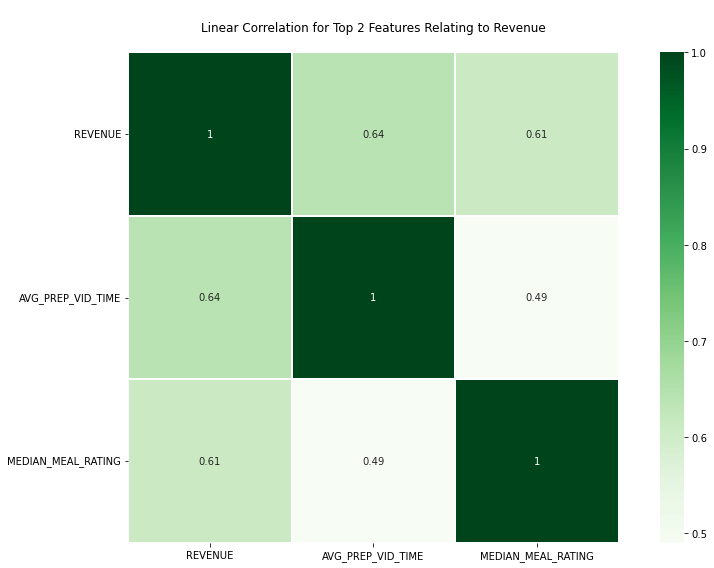

In [13]:
# setting figure size
fig, ax = plt.subplots(figsize=(12,8))

# limiting the size of the correlation matrix
df_corr2 = df_corr.loc[ ['REVENUE', 'AVG_PREP_VID_TIME',
                         'MEDIAN_MEAL_RATING'],
                        ['REVENUE', 'AVG_PREP_VID_TIME',
                         'MEDIAN_MEAL_RATING']]

# visualizing the correlation matrix
sns.heatmap(df_corr2,
            cmap = 'Greens',
            square = True,
            annot = True,
            linecolor = 'white',
            linewidths = 1,
            cbar = True)

# aligning y-axis ticks 
plt.yticks(np.arange(3)+0.5,('REVENUE','AVG_PREP_VID_TIME',
                             'MEDIAN_MEAL_RATING',), 
                               rotation=0, fontsize="10", va="center")

# title the plot
plt.title("""
Linear Correlation for Top 2 Features Relating to Revenue
""")

# fixing layout and display
plt.tight_layout()
plt.show()

**Appendix C:** *Chart of Important Features Predictive of Cross-Selling Promotional Success* 

<ipython-input-2-06cee4121203>:81: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


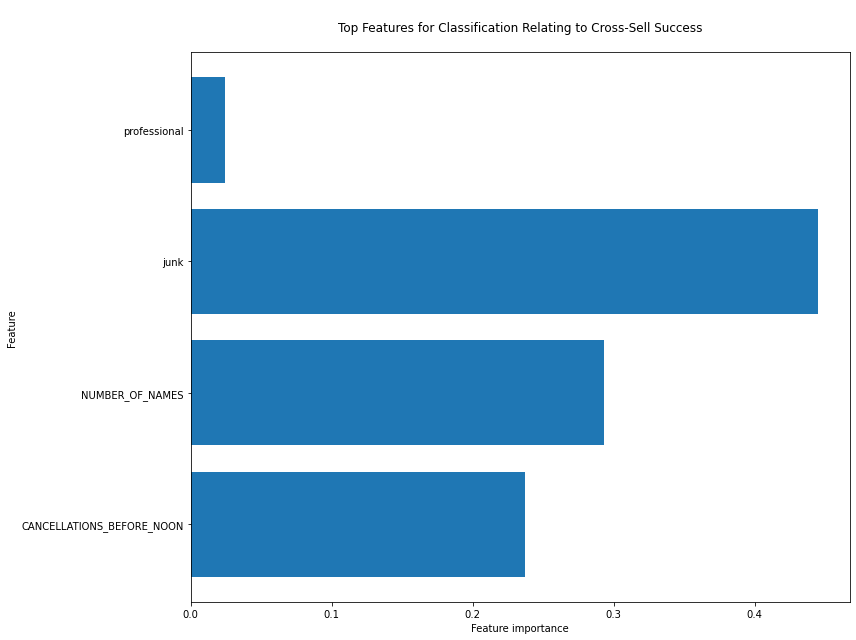

In [14]:
# plotting feature importance
plot_feature_importances(tree_tuned_fit,
                         train  = x_train,
                         export = False)

# title the plot
plt.title("""
Top Features for Classification Relating to Cross-Sell Success
""")

# fix layout and display
plt.tight_layout()

# References

- Buckle, C. (2018). Rethinking “Trust” in a New Era of Data Privacy. GWI. https://blog.globalwebindex.com/chart-of-the-week/trust-data-privacy/


- Kvidahl, M. (2018). Personalized ready meals: Where customization meets convenience. Natural Products INSIDER. https://www.naturalproductsinsider.com/foods/personalized-ready-meals-where-customization-meets-convenience


- Thurston, L. (2015). Why Tasty Videos are so Successful | Facebook Strategy. Retrieved January 29, 2021, from https://roundpeg.biz/2017/11/tasty-videos-successful/
